In [ ]:
#sebelum time series forecasting, pengecekan stationarity wajib dilakukan.
#stationarity adalah tolak ukur bahwa data time series memiliki rata-rata dan variance yang konsisten,
#dengan kata lain, data tersebut tidak memiliki trend atau seasonality sehingga bisa diprediksi / diforecast.
#Sama seperti modeling, kita butuh summary statistics dari observasi tsb konsisten, begitu jg yg di data time series,
#konsistensi itu bisa digambarkan dengan stationarity

In [ ]:
#Bagaimana cara mengecek stationarity?
#1. dengan melihat plot data
#2. Pakai summary statistics terutama mean dan varians
#3. Pakai statistical test (Uji hipotesis)

In [ ]:
#Let's go, ada dua dataset yaitu daily-total-female-births.csv dan airline-passengers.csv

In [ ]:
#Cara pertama dengan melihat Plot

In [1]:
from pandas import Series
from matplotlib import pyplot

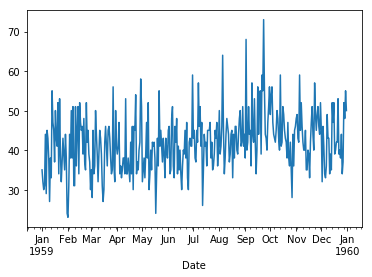

In [13]:
series1 = Series.from_csv("daily-total-female-births.csv", header=0)
series1.plot()
pyplot.show()

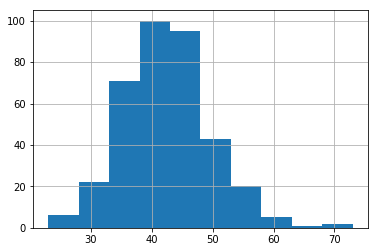

In [14]:
series1.hist()
pyplot.show()

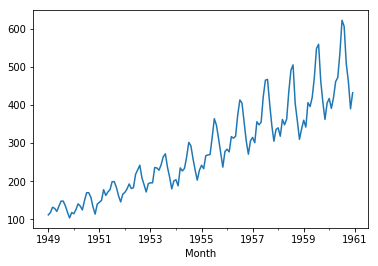

In [15]:
series2 = Series.from_csv("airline-passengers.csv", header=0)
series2.plot()
pyplot.show()

In [ ]:
#2. Menggunakan Summary Statistics

In [11]:
#sekarang kita bagi dataset series1 menjadi dau bagian/part yang menyambung (contiguous sequences)
values1 = series1.values
split = int(len(values1)/2)
sq1, sq2 = values1[0:split], values1[split:]
mean1, mean2 = sq1.mean(), sq2.mean()
var1, var2 = sq1.var(), sq2.var()
print("mean1 = %f, mean2 = %f" %(mean1, mean2))
print("var1 = %f, var2 = %f" %(var1, var2))

mean1 = 39.763736, mean2 = 44.185792
var1 = 49.213410, var2 = 48.708651


In [16]:
values2 = series2.values
split2 = int(len(values2) / 2)
sq1, sq2 = values2[0:split2], values2[split2:]
mean1, mean2 = sq1.mean(), sq2.mean()
var1, var2 = sq1.var(), sq2.var()
print("mean1 = %f, mean2 = %f" %(mean1, mean2))
print("var1 = %f, var2 = %f" %(var1, var2))

mean1 = 182.902778, mean2 = 377.694444
var1 = 2244.087770, var2 = 7367.962191


In [ ]:
#3.Menggunakan Statistical Test dengan Augmented Duckey Fuller Test 
# H0: jika H0 gagal ditolak maka data time series memiliki unit root, yang artinya non-stationary 
#     karena data tersebut memili beberapa time dependent structure
# H1: jika H0 berhasil ditolak maka data time series tidak memiliki unit root yang artiny data stationer

# untuk menentukan tolak atau gagal tolak H0, kita butuh p-value
# jika p-value > 0.05 maka gagal tolak H0
# jika p-value <= 0.05 maka berhasil tolak H0

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
#kita cek pada non-stationary data yaitu pada data airline-passengers
result2 = adfuller(series2)
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


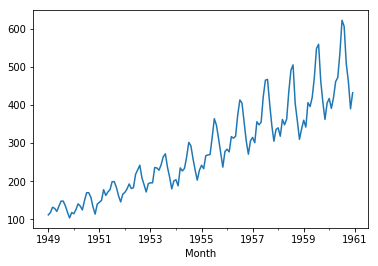

In [19]:
series2.plot()
pyplot.show()

In [ ]:
#nilai p-Value = 0.992 yang artinya > 0.05 maka keputusannya adalah gagal tolak H0
#artinya data airline-passenger adalah non-stationary
#cara untuk mentransformasi data agar tidak stationer maka kita lakukan differencing, misal dengan me-log kan data

In [20]:
from numpy import log
series2 = log(series2)
result2 = adfuller(series2)
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


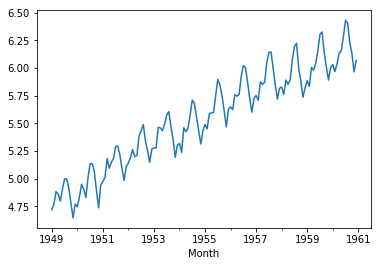

In [21]:
series2.plot()
pyplot.show()